#REGRESSION MODEL WHICH PREDICTS THE COFFEE CONSUMPTION IN NEXT 3 MONTHS

Mean Absolute Error: 741.1869918699085
Predicted spending for 2025-01: 1429.84 TL
Predicted spending for 2025-02: 1374.34 TL
Predicted spending for 2025-03: 1318.85 TL


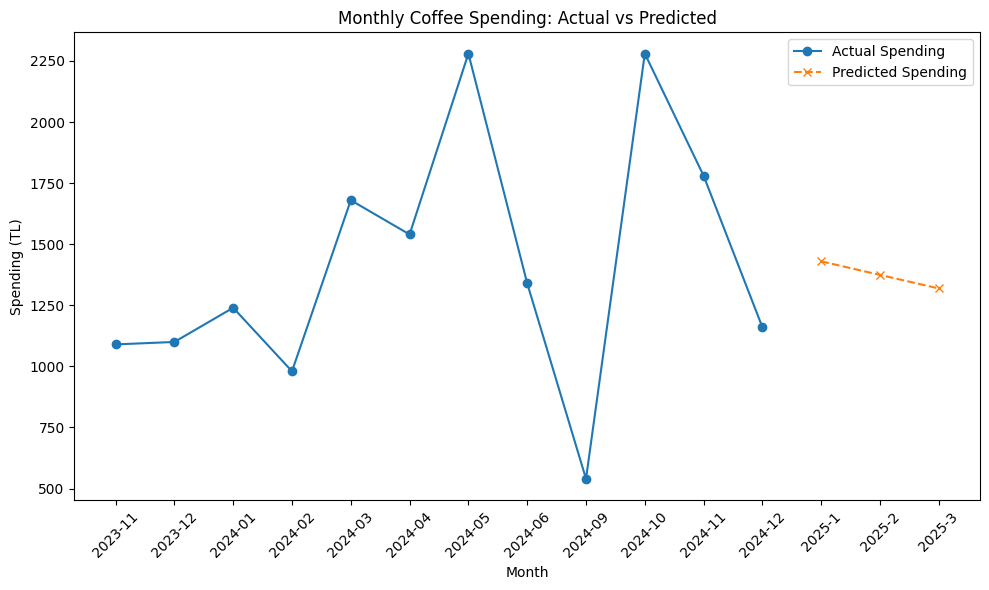

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def load_and_process_coffee_data(csv_file):
    data = pd.read_csv(csv_file, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
    data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
    data = data[data['Date'] != 'Date']

    data['Date'] = pd.to_datetime(data['Date'])

    spending_map = {
        'STARBUCKS': 100,
        'COFFY': 60,
        'BREKKIE': 150,
        'MORN': 200,
        'PETRA': 200
    }
    
    data['Spending'] = data['Place'].map(spending_map).fillna(0)
    
    return data

coffee_csv_file = 'spending_data1.csv'

coffee_data = load_and_process_coffee_data(coffee_csv_file)

coffee_data['YearMonth'] = coffee_data['Date'].dt.to_period('M')

monthly_spending = coffee_data.groupby('YearMonth')['Spending'].sum().reset_index()

monthly_spending['Month'] = monthly_spending['YearMonth'].dt.month
monthly_spending['Year'] = monthly_spending['YearMonth'].dt.year


X = monthly_spending[['Year', 'Month']]
y = monthly_spending['Spending']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

last_year, last_month = X['Year'].max(), X['Month'].max()

next_months = []
for i in range(1, 4):
    new_month = last_month + i
    new_year = last_year
    if new_month > 12:
        new_month -= 12
        new_year += 1
    next_months.append({'Year': new_year, 'Month': new_month})

next_months = pd.DataFrame(next_months)

future_predictions = model.predict(next_months)

for i, row in next_months.iterrows():
    print(f"Predicted spending for {row['Year']}-{row['Month']:02d}: {future_predictions[i]:.2f} TL")

plt.figure(figsize=(10, 6))
plt.plot(monthly_spending['YearMonth'].astype(str), monthly_spending['Spending'], label='Actual Spending', marker='o')
plt.plot(next_months['Year'].astype(str) + '-' + next_months['Month'].astype(str), future_predictions, label='Predicted Spending', marker='x', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Spending (TL)')
plt.title('Monthly Coffee Spending: Actual vs Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#REGRESSION MODEL FOR STARBUCKS AND COFFY SEPERATELY


Analyzing spending for: STARBUCKS
Mean Absolute Error for STARBUCKS: 555.77 TL
Predicted spending for STARBUCKS, Month 13: 1380.49 TL
Predicted spending for STARBUCKS, Month 14: 1340.98 TL
Predicted spending for STARBUCKS, Month 15: 1301.46 TL


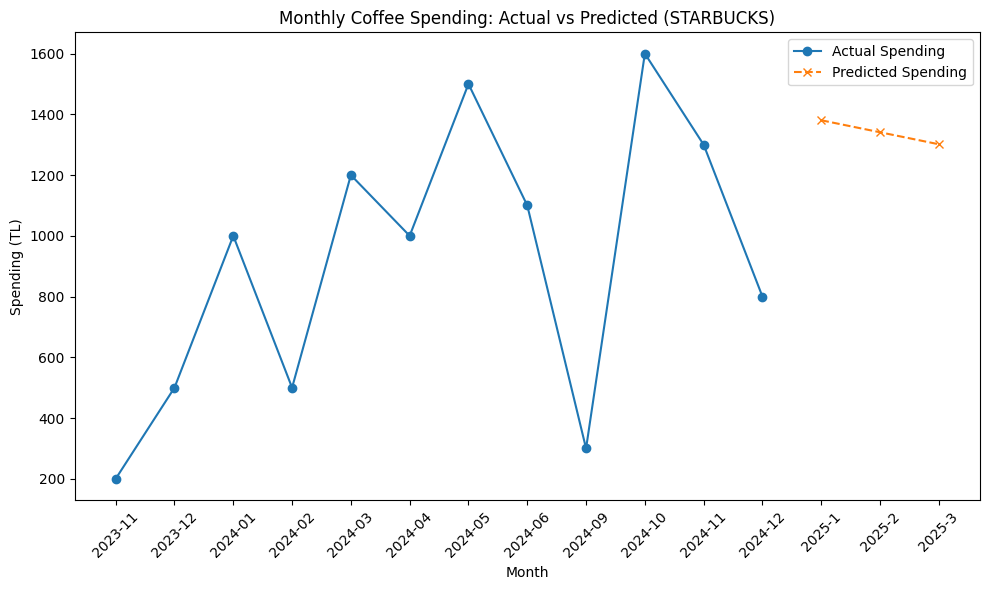


Analyzing spending for: COFFY
Mean Absolute Error for COFFY: 92.00 TL
Predicted spending for COFFY, Month 13: 240.00 TL
Predicted spending for COFFY, Month 14: 228.00 TL
Predicted spending for COFFY, Month 15: 216.00 TL


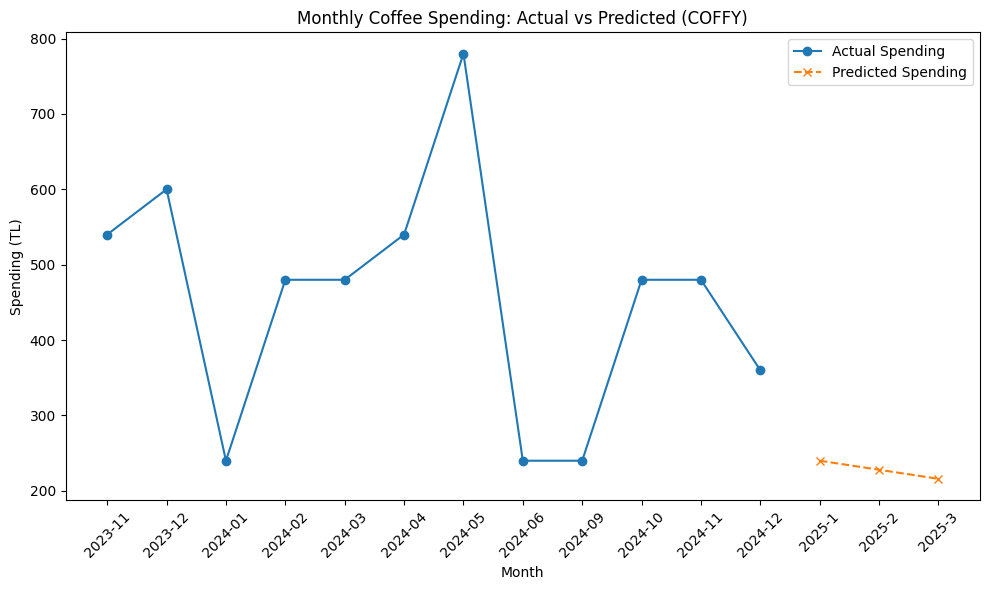

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def load_and_process_coffee_data(csv_file):
    data = pd.read_csv(csv_file, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
    data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
    data = data[data['Date'] != 'Date'] 

    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    spending_map = {
        'STARBUCKS': 100,
        'COFFY': 60
    }
    
    data['Spending'] = data['Place'].map(spending_map).fillna(0)
    data['YearMonth'] = data['Date'].dt.to_period('M')
    return data.dropna(subset=['Date', 'Place'])

def prepare_data(data, place):
    place_data = data[data['Place'] == place]
    if place_data.empty:
        print(f"No data available for place: {place}")
        return None
    monthly_spending = place_data.groupby('YearMonth')['Spending'].sum().reset_index()
    monthly_spending['Month'] = monthly_spending['YearMonth'].dt.month
    monthly_spending['Year'] = monthly_spending['YearMonth'].dt.year
    return monthly_spending

def predict_next_months(model, last_year, last_month):
    next_months = pd.DataFrame({
        'Year': [last_year if last_month + i <= 12 else last_year + 1 for i in range(1, 4)],
        'Month': [(last_month + i - 1) % 12 + 1 for i in range(1, 4)]
    })
    predictions = model.predict(next_months)
    return next_months, predictions

def plot_predictions(monthly_spending, next_months, predictions, place):
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_spending['YearMonth'].astype(str), monthly_spending['Spending'], label='Actual Spending', marker='o')
    plt.plot(next_months['Year'].astype(str) + '-' + next_months['Month'].astype(str), predictions, label='Predicted Spending', marker='x', linestyle='--')
    plt.xlabel('Month')
    plt.ylabel('Spending (TL)')
    plt.title(f'Monthly Coffee Spending: Actual vs Predicted ({place})')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

coffee_csv_file = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'

coffee_data = load_and_process_coffee_data(coffee_csv_file)
selected_places = ['STARBUCKS', 'COFFY']

for place in selected_places:
    print(f"\nAnalyzing spending for: {place}")
    monthly_spending = prepare_data(coffee_data, place)
    
    if monthly_spending is None:
        continue
    
    X = monthly_spending[['Year', 'Month']]
    y = monthly_spending['Spending']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error for {place}: {mae:.2f} TL")
    
    last_year, last_month = X['Year'].max(), X['Month'].max()
    next_months, future_predictions = predict_next_months(model, last_year, last_month)
    
    for i, pred in enumerate(future_predictions, 1):
        print(f"Predicted spending for {place}, Month {last_month + i}: {pred:.2f} TL")
    
    plot_predictions(monthly_spending, next_months, future_predictions, place)
